In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/theakshaydas/PGP-AIML/master/CaseStudies/01-UBER/Uber%20Drives%202016.csv")

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# **How many rows and columns are there in the dataset?**

In [4]:
df.shape

(1156, 7)

# **What are the column names in the dataset?**

In [5]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

# **What is the data type of each column?**

In [6]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

# **If there is Null Value remove it**

In [7]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [8]:
df.dropna(inplace = True)
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

# **How many unique categories are there in the "CATEGORY*" column**

In [9]:
df["CATEGORY*"].unique()

array(['Business', 'Personal'], dtype=object)

# **How many unique purposes are there in the "PURPOSE*" column?**

In [10]:
df["PURPOSE*"].unique()

array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

# **What is the total number of miles driven in this dataset?**

In [11]:
total_mile = df["MILES*"].sum()
total_mile

7311.200000000001

# **What is the average distance (miles) per trip?**

In [12]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [13]:
mile_per_trip = df["MILES*"].mean()
mile_per_trip

11.196324655436449

# **What is the most common starting point ("START*")?**

In [14]:
df["START*"].describe()

count      653
unique     131
top       Cary
freq       161
Name: START*, dtype: object

In [15]:
print("Most common starting Point is : Cary")

Most common starting Point is : Cary


# **What is the most common ending point ("STOP*")?**

In [16]:
df["STOP*"].describe()

count      653
unique     137
top       Cary
freq       155
Name: STOP*, dtype: object

In [17]:
print("Most common ending point is : Cary")

Most common ending point is : Cary


# **What is the average duration of a trip?**

In [18]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [19]:
df["START_DATE*"] = pd.to_datetime(df["START_DATE*"])
df["END_DATE*"] = pd.to_datetime(df["END_DATE*"])
df["duration"] = (df["END_DATE*"]-df["START_DATE*"] ).dt.total_seconds() / 60

avg_duration = df["duration"].mean()
print("Average Duration of trip is : ", avg_duration , "min")

Average Duration of trip is :  23.398162327718225 min


# **What is the most common purpose for taking an Uber ride?**

In [20]:
df["PURPOSE*"].describe()

count         653
unique         10
top       Meeting
freq          187
Name: PURPOSE*, dtype: object

In [21]:
print("Most common purpose for taking an Uber ride is :  Meeting")

Most common purpose for taking an Uber ride is :  Meeting


# **How many rides were for business purposes ("CATEGORY* = Business")?**

In [22]:
df["CATEGORY*"].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

In [23]:
print("647 rides were for business purposes")

647 rides were for business purposes


# **How many rides were for personal purposes ("CATEGORY* = Personal")**

In [24]:
print("6  rides were for personal purposes")

6  rides were for personal purposes


# **What is the maximum distance traveled in a single trip?**

In [25]:
print("Maximum distance traveled in a single trip is : ",df["MILES*"].max() , "miles")

Maximum distance traveled in a single trip is :  310.3 miles


# **What is the minimum distance traveled in a single trip?**

In [26]:
print("Minimum distance traveled in a single trip is : ",df["MILES*"].min(), "miles")

Minimum distance traveled in a single trip is :  0.5 miles


# **How does the distribution of trip purposes vary by category?**

In [27]:
contingency_table = pd.crosstab(df["CATEGORY*"] , df["PURPOSE*"])
contingency_table

PURPOSE*,Airport/Travel,Between Offices,Charity ($),Commute,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Temporary Site
CATEGORY*,,,,,,,,,,
Business,3,18,0,0,101,128,160,187,0,50
Personal,0,0,1,1,0,0,0,0,4,0


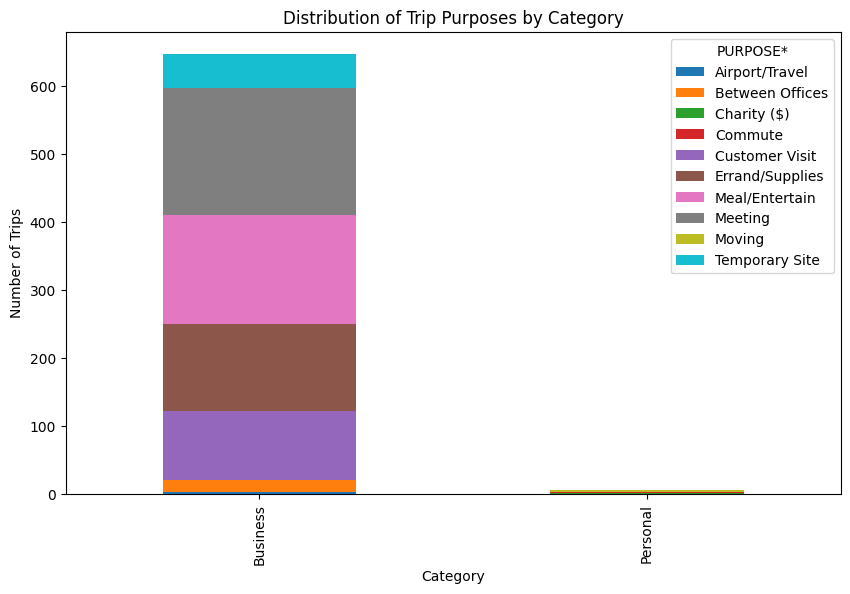

In [28]:
purpose_by_category = df.groupby(["CATEGORY*" ,"PURPOSE*" ]).size().unstack()

purpose_by_category.plot(kind = "bar" , stacked = True , figsize=(10,6))
plt.xlabel("Category")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trip Purposes by Category")
plt.show()

# **What is the distribution of trip distances by category?**

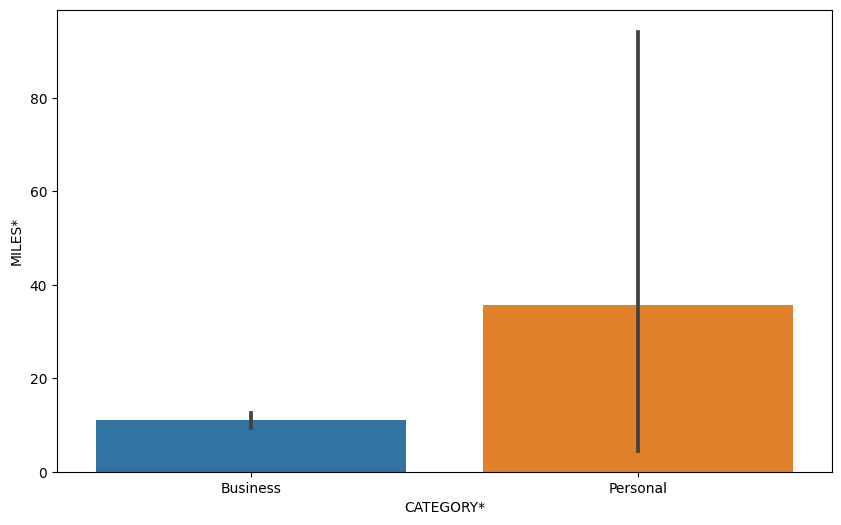

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(x = "CATEGORY*" , y= "MILES*" , data = df)
plt.show()

In [30]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'duration'],
      dtype='object')

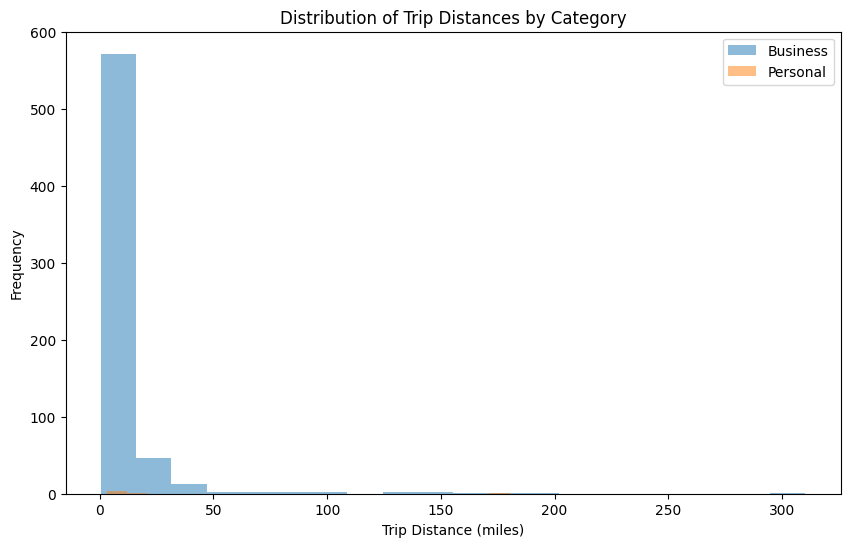

In [31]:
category_groups = df.groupby("CATEGORY*")

# Create a figure and axis for the plots
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each category and plot the distribution of trip distances
for category, group_data in category_groups:
    ax.hist(group_data["MILES*"], bins=20, alpha=0.5, label=category)

# Add labels and a legend
ax.set_xlabel("Trip Distance (miles)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Trip Distances by Category")
ax.legend()

# Show the plot
plt.show()

# **What is the average distance for each purpose of the trip?**

In [32]:
avg_distance_each_purpose = df.groupby("PURPOSE*")["MILES*"].mean().reset_index()
avg_distance_each_purpose

,PURPOSE*,MILES*
0,Airport/Travel,5.500000
1,Between Offices,10.944444
2,Charity ($),15.100000
3,Commute,180.200000
4,Customer Visit,20.688119
5,Errand/Supplies,3.968750
6,Meal/Entertain,5.698125
7,Meeting,15.247594
8,Moving,4.550000
9,Temporary Site,10.474000


# **What is the most common combination of start and stop points?**

In [33]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'duration'],
      dtype='object')

In [34]:
common_combination = df.groupby(["START*" , "STOP*"]).size().reset_index(name = "Count")

most_common = common_combination[common_combination["Count"] == common_combination["Count"].max()].reset_index()

most_common

,index,START*,STOP*,Count
0,26,Cary,Morrisville,52


# **Can you find any correlation between the distance traveled and the duration of the trip?**

In [35]:
df["MILES*"].corr(df["duration"])

0.9057424296726834

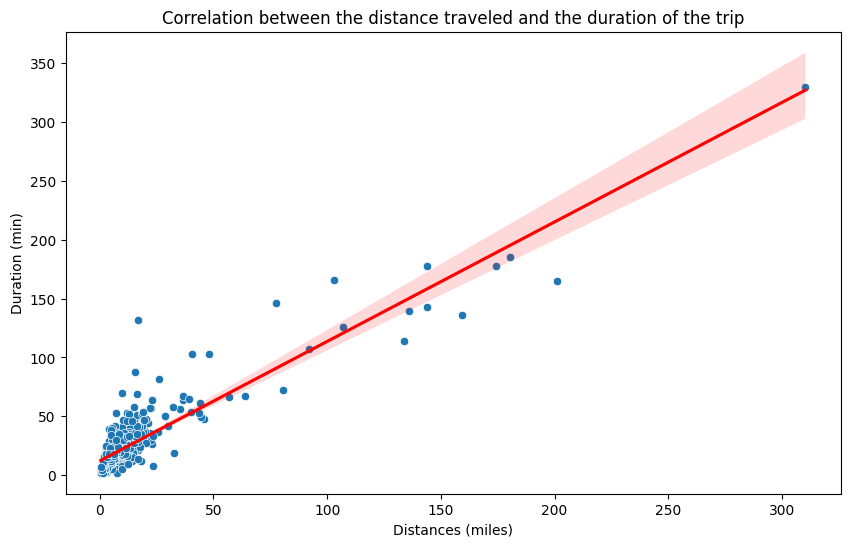

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "MILES*" , y ="duration" , data=df )
sns.regplot(x = "MILES*" , y ="duration" , data=df , scatter = False , color="red")
plt.xlabel("Distances (miles)")
plt.ylabel("Duration (min)")
plt.title("Correlation between the distance traveled and the duration of the trip")
plt.show()

# **What is the average speed for each category of trips**

In [37]:
df["Duration (hr)"] = (df["END_DATE*"] - df["START_DATE*"]).dt.total_seconds()/3600

In [38]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'duration', 'Duration (hr)'],
      dtype='object')

In [39]:
avg_speed_by_category = df.groupby("CATEGORY*")["MILES*", "Duration (hr)"].sum().reset_index()
avg_speed_by_category["Average_speed (mile/hr)"] = avg_speed_by_category["MILES*"] / avg_speed_by_category["Duration (hr)"]

avg_speed_by_category[["CATEGORY*" , "Average_speed (mile/hr)"]]

<ipython-input-39-5cabcc4178eb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_speed_by_category = df.groupby("CATEGORY*")["MILES*", "Duration (hr)"].sum().reset_index()


,CATEGORY*,Average_speed (mile/hr)
0,Business,28.377557
1,Personal,47.095588


# **How many trips were taken in each month of the year 2016?**

In [40]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'duration', 'Duration (hr)'],
      dtype='object')

In [41]:
df["START_DATE*"] = pd.to_datetime(df["START_DATE*"])

df["Month"] = df["START_DATE*"].dt.month

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df["Month"] = df["Month"].map(month_names)

In [42]:
monthly_trip_count = df["Month"].value_counts().reset_index()
monthly_trip_count.columns=["Month_name" , "No_of_trips"]
monthly_trip_count

,Month_name,No_of_trips
0,December,134
1,February,82
2,June,73
3,March,71
4,November,60
5,January,59
6,April,50
7,May,46
8,July,46
9,October,20


# **Which day of the week had the highest number of trips on average?**

In [43]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'duration', 'Duration (hr)', 'Month'],
      dtype='object')

In [44]:
df["START_DATE*"] = pd.to_datetime(df["START_DATE*"])

df["Day_of_week"] = df["START_DATE*"].dt.dayofweek
trip_count = df["Day_of_week"].value_counts().reset_index()
trip_count.columns= ["Day","trip_counts"]
trip_count

,Day,trip_counts
0,4,125
1,1,94
2,3,92
3,6,87
4,0,87
5,2,85
6,5,83


In [45]:
days = {0:"Monday" , 1:"Tuesday" , 2:"Wednesday" , 3:"Thursday" , 4:"Friday" , 5:"Saturday" ,6:"Sunday"}
trip_count["Day"]=trip_count["Day"].map(days)


trip_count

,Day,trip_counts
0,Friday,125
1,Tuesday,94
2,Thursday,92
3,Sunday,87
4,Monday,87
5,Wednesday,85
6,Saturday,83


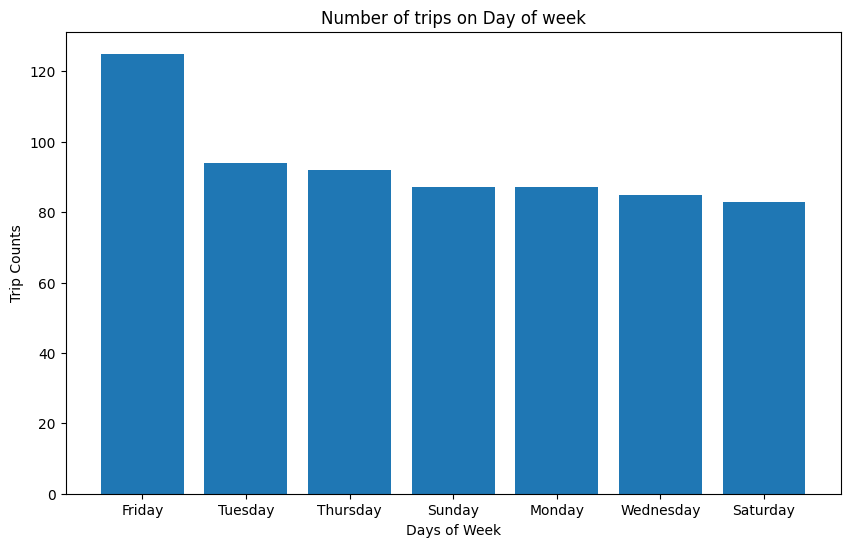

In [46]:
plt.figure(figsize =(10,6))
plt.bar(trip_count["Day"],trip_count["trip_counts"])
plt.xlabel("Days of Week")
plt.ylabel("Trip Counts")
plt.title("Number of trips on Day of week")
plt.show()

In [47]:
print("Friday  had the highest number of trips on average")

Friday  had the highest number of trips on average


# **What is the average distance traveled on weekends vs. weekdays?**

In [48]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'duration', 'Duration (hr)', 'Month', 'Day_of_week'],
      dtype='object')

In [49]:
def categorize_day(Day_of_week):
  if Day_of_week > 5:
    return "Weekday"
  else:
    return "Weekend"

df["Day_category"] = df["Day_of_week"].apply(categorize_day)

avd_distance_by_day = df.groupby("Day_category")["MILES*"].mean()

avd_distance_by_day

Day_category
Weekday    10.990805
Weekend    11.227915
Name: MILES*, dtype: float64